<a href="https://colab.research.google.com/github/rfb0408/python_data_analyst_study/blob/main/8%EC%9D%BC%EC%B0%A8_%EC%A0%95%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 공공자전거 수요

In [ ]:
# count 값을 예측하는 모델을 만들어 보자
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

bike = pd.read_csv("bike.csv")
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [ ]:
del bike['registered']
del bike['datetime']
bike.info() #1. 먼저 정보부터 확인 누락값이나 문제있는 열이 있는지 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 850.6 KB


In [ ]:
bike.corr()# count열과 다른 열들의 상관계수 확인

<ipython-input-6-cadf22252240>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bike.corr()# count열과 다른 열들의 상관계수 확인


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.690414
count,0.163439,-0.005393,0.011594,-0.128655,0.394454,0.389784,-0.317371,0.101369,0.690414,1.000000


<ipython-input-9-89eae151b3de>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  a=bike.corr()


<Axes: >

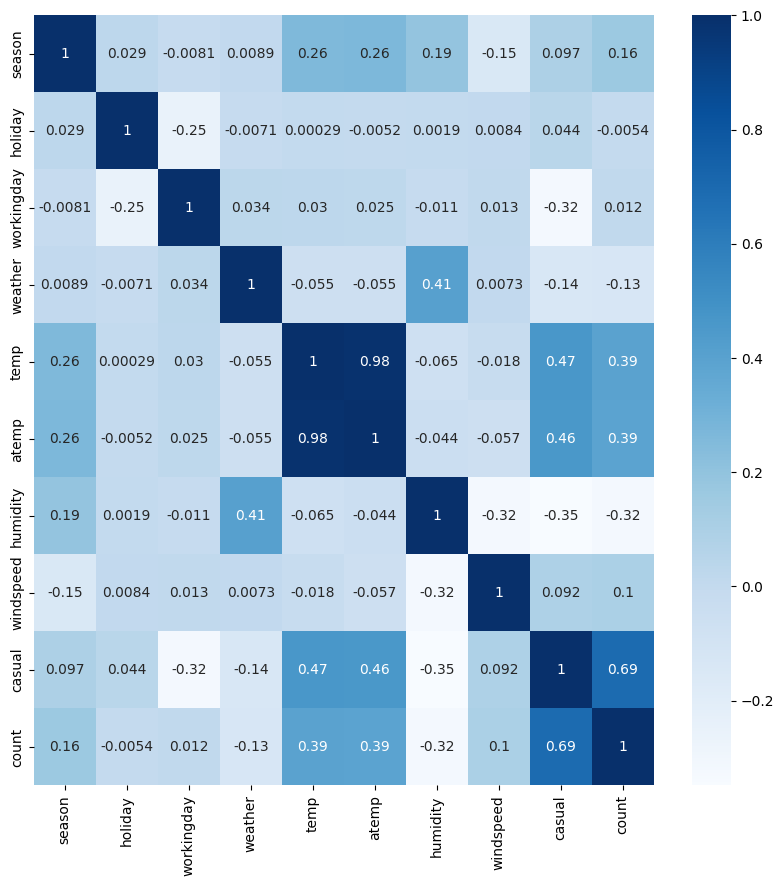

In [ ]:
plt.figure(figsize=(10,10))
a=bike.corr()
sns.heatmap(a,annot=True,cmap='Blues')

<Axes: >

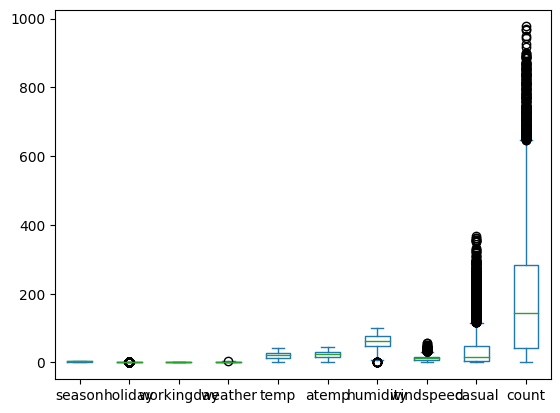

In [ ]:
bike.plot.box() # casual이랑 count가 이상치가 심해보인다. 이상치는 없애도 되지만, 왠만해서 안 없애는게 좋다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# 문제: season, holiday, workingday, temp, atemp, humidity, windspeed, casual
# 정답: count

data=np.array(bike.iloc[:,:-1])
target=np.array(bike['count'])

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2)

rf=RandomForestRegressor()
rf.fit(train_x,train_y)
rf.score(test_x,test_y)

0.6556823219896233

시간 정보가 빠져서 데이터의 정확도가 떨어지는 것 같다. 시간 정보를 넣어보자

In [ ]:
bike = pd.read_csv("bike.csv") # 파생변수(연도, 월, 일, 시간, 요일)
del bike['registered']

bike['datetime'] = pd.to_datetime(bike['datetime'])

bike["year"] = bike['datetime'].dt.year
bike["month"] = bike['datetime'].dt.month
bike["day"] = bike['datetime'].dt.day
bike["hour"] = bike['datetime'].dt.hour
bike["weekday"] = bike['datetime'].dt.weekday

del bike['datetime']

data = bike.drop("count", axis = 1).to_numpy()
target = bike['count'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2)

rf = RandomForestRegressor()
rf.fit(train_x, train_y)
rf.score(test_x, test_y)

0.967070836001314

<Axes: xlabel='hour', ylabel='count'>

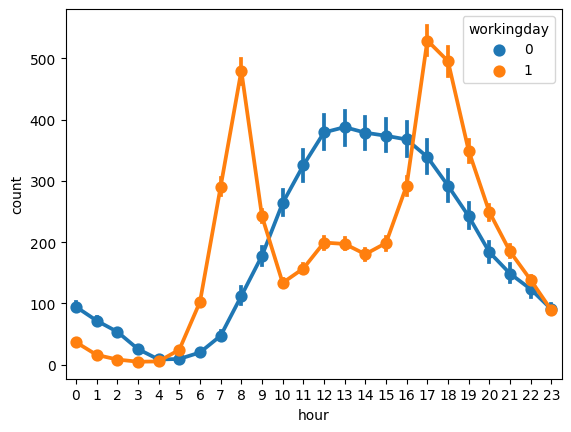

In [ ]:
sns.pointplot(data=bike,x='hour',y='count',hue='workingday')

## pima_indians - 인공신경망과 딥러닝

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
# StandardScaler : 평균 표준편차 구해서 알아서 표준화를 해준다.외에도 RobustScaler,MinMaxScaler 가 있다

pima=pd.read_csv("/content/pima_indians.csv")

data=pima.iloc[:,:-1].to_numpy()
target = pima['Class'].to_numpy()

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size = 0.2)

ss=StandardScaler() # 표준화 모델을 가져와서 ss에 넣는다
train_scaled=ss.fit_transform(train_x) # fit_transform() : ()안의 값을 fit(학습)하고 transform(변환(평균 빼고 표준편차 나누는 과정))하라는 명령어
test_scaled=ss.transform(test_x) # 시험데이터에 이미 훈련데이터에서 얻은 값으로 transform하라

rf = RandomForestClassifier()
rf.fit(train_x, train_y)
rf.score(test_x, test_y)

0.7857142857142857

## 인공신경망

은닉층이 없으면 딥러닝이 아니고 일반적인 인공신경망이다.


은닉층이 하나라도 있으면 딥러닝, 없으면 인공신경망이다.


분류모델 - 시그모이드 함수(0부터 1까지의 값으로 만들어 주는 함수)를 붙여줘야 한다!



In [ ]:
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
train_scaled.shape, test_scaled.shape

((614, 8), (154, 8))

In [ ]:
train_y.shape, test_y.shape

((614,), (154,))

In [ ]:
from tensorflow import keras

model=keras.Sequential() # 인공신경망을 설계하기 위한 도화지
model.add(keras.layers.Dense(2,activation='softmax',input_shape=(8,))) # 'softmax'는 시그모이드이다

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam') # 어떻게 학습할 것인가에 대한 내용

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 2)                 18        
                                                                 
Total params: 18 (72.00 Byte)
Trainable params: 18 (72.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history=model.fit(train_scaled, train_y,epochs=500)

Epoch 1/500
20/20 [==============================] - 0s 2ms/step - loss: 0.7553 - accuracy: 0.6596
Epoch 2/500
20/20 [==============================] - 0s 2ms/step - loss: 0.7300 - accuracy: 0.6645
Epoch 3/500
20/20 [==============================] - 0s 2ms/step - loss: 0.7085 - accuracy: 0.6694
Epoch 4/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.6775
Epoch 5/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6857
Epoch 6/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6510 - accuracy: 0.7003
Epoch 7/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.7003
Epoch 8/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6193 - accuracy: 0.7052
Epoch 9/500
20/20 [==============================] - 0s 2ms/step - loss: 0.6053 - accuracy: 0.7101
Epoch 10/500
20/20 [==============================] - 0s 2ms/step - loss: 0.5930 - accuracy: 0.7166
Epoch 11/

In [ ]:
# 인공 신경망의 정확도 : 약 76%
model.evaluate(test_scaled,test_y)

5/5 [==============================] - 1s 4ms/step - loss: 0.4862 - accuracy: 0.7597


[0.48615360260009766, 0.7597402334213257]

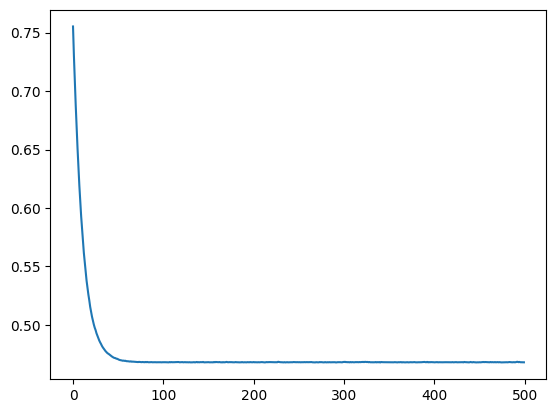

In [ ]:
# 오차가 줄어드는 모습을 확인 할 수 있음
plt.plot(history.history['loss'])

## 딥러닝

컴퓨터가 완벽하게 학습하면 안된다. 왜냐하면 너~무 완벽하게 학습해버리면 조금만 달라도 오답처리를 하기 때문이다.

예시) 얼굴인식에서 수염을 안 깎았을 뿐인데 너무 완벽하게 학습한 나머지 타인이라고 인식해버림.

즉, 딥러닝은 과대적합을 막으면서 학습하는 기술이다.

In [37]:
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.Dense(2,activation='softmax',input_shape=(8,)))

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')

history=model.fit(train_scaled, train_y,epochs=500,
                  validation_data=(test_scaled,test_y)) # validation_data 한번 학습이 끝날때마다 test로 쪽지시험을 쳐보겠다는 의미

Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 1.1215 - accuracy: 0.3762 - val_loss: 1.1327 - val_accuracy: 0.3571
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 1.0769 - accuracy: 0.3941 - val_loss: 1.0903 - val_accuracy: 0.3831
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 1.0337 - accuracy: 0.4088 - val_loss: 1.0503 - val_accuracy: 0.4286
Epoch 4/500
20/20 [==============================] - 0s 3ms/step - loss: 0.9956 - accuracy: 0.4316 - val_loss: 1.0112 - val_accuracy: 0.4610
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.9583 - accuracy: 0.4528 - val_loss: 0.9752 - val_accuracy: 0.4675
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.9240 - accuracy: 0.4707 - val_loss: 0.9430 - val_accuracy: 0.4870
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.8928 - accuracy: 0.4935 - val_loss: 0.9122 - val_accuracy: 0.4935
Epoch 8/500


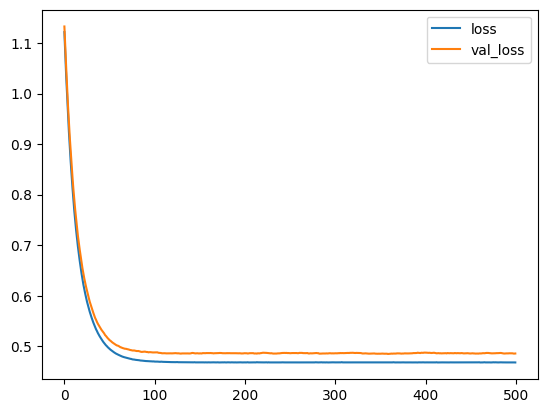

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) # 쪽지시험의 결과는 val_loss에 저장
plt.legend(['loss','val_loss'])
plt.show() # val_loss 가 loss보다 커지는 것으로 보아 과대적합이 일어났음을 알 수 있음

In [48]:
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.Dense(2,activation='softmax',input_shape=(8,)))

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')

# 과대적합이 일어날 거 같으면 끝내라.
# 20번 참도 학습을 멈춤. 그리고 참은 기간을 무효화 함

es=keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

history=model.fit(train_scaled, train_y,epochs=500,
                  validation_data=(test_scaled,test_y),callbacks=[es])

Epoch 1/500
20/20 [==============================] - 1s 12ms/step - loss: 1.1642 - accuracy: 0.4414 - val_loss: 1.1068 - val_accuracy: 0.4675
Epoch 2/500
20/20 [==============================] - 0s 3ms/step - loss: 1.1220 - accuracy: 0.4544 - val_loss: 1.0716 - val_accuracy: 0.4805
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 1.0839 - accuracy: 0.4609 - val_loss: 1.0395 - val_accuracy: 0.4935
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 1.0486 - accuracy: 0.4756 - val_loss: 1.0106 - val_accuracy: 0.5195
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 1.0158 - accuracy: 0.4821 - val_loss: 0.9845 - val_accuracy: 0.5325
Epoch 6/500
20/20 [==============================] - 0s 3ms/step - loss: 0.9866 - accuracy: 0.4902 - val_loss: 0.9601 - val_accuracy: 0.5455
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.9587 - accuracy: 0.5016 - val_loss: 0.9370 - val_accuracy: 0.5649
Epoch 8/500


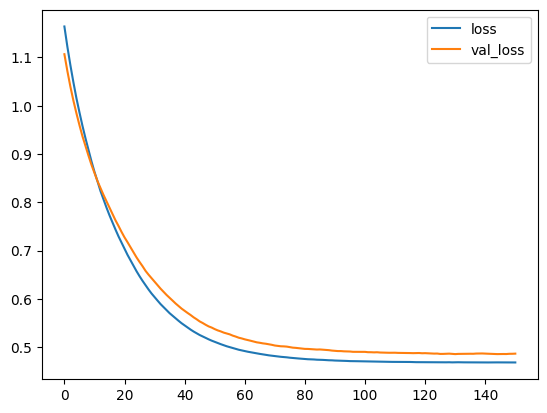

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [50]:
# 딥러닝
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.Dense(32,activation='relu',input_shape=(8,)))
model.add(keras.layers.Dense(32,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')

es=keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

history=model.fit(train_scaled, train_y,epochs=500,
                  validation_data=(test_scaled,test_y))

Epoch 1/500
20/20 [==============================] - 1s 13ms/step - loss: 0.6100 - accuracy: 0.7117 - val_loss: 0.5998 - val_accuracy: 0.6558
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5460 - accuracy: 0.7410 - val_loss: 0.5700 - val_accuracy: 0.6688
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5097 - accuracy: 0.7557 - val_loss: 0.5537 - val_accuracy: 0.6753
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4906 - accuracy: 0.7671 - val_loss: 0.5436 - val_accuracy: 0.6948
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4759 - accuracy: 0.7736 - val_loss: 0.5335 - val_accuracy: 0.7078
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 0.4656 - accuracy: 0.7785 - val_loss: 0.5262 - val_accuracy: 0.7143
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.4572 - accuracy: 0.7883 - val_loss: 0.5207 - val_accuracy: 0.7273
Epoch 8/500


In [51]:
model.evaluate(test_scaled,test_y) # 정확도 약 72%

5/5 [==============================] - 0s 3ms/step - loss: 1.6076 - accuracy: 0.7208


[1.6076178550720215, 0.7207792401313782]

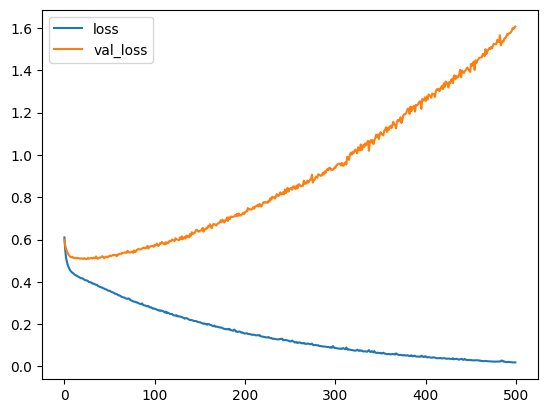

In [52]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show() # 엄청나게 과대적합이 일어났다.

In [60]:
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.Dense(16,activation='relu',input_shape=(8,)))
model.add(keras.layers.Dense(2,activation='softmax'))

es=keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')

history=model.fit(train_scaled, train_y,epochs=500,
                  validation_data=(test_scaled,test_y),callbacks=[es])

Epoch 1/500
20/20 [==============================] - 1s 13ms/step - loss: 0.7342 - accuracy: 0.5993 - val_loss: 0.7364 - val_accuracy: 0.5779
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6855 - accuracy: 0.6287 - val_loss: 0.6964 - val_accuracy: 0.6169
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6511 - accuracy: 0.6417 - val_loss: 0.6659 - val_accuracy: 0.6364
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6227 - accuracy: 0.6629 - val_loss: 0.6431 - val_accuracy: 0.6688
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6011 - accuracy: 0.6873 - val_loss: 0.6219 - val_accuracy: 0.6623
Epoch 6/500
20/20 [==============================] - 0s 5ms/step - loss: 0.5821 - accuracy: 0.6889 - val_loss: 0.6052 - val_accuracy: 0.6623
Epoch 7/500
20/20 [==============================] - 0s 6ms/step - loss: 0.5649 - accuracy: 0.7036 - val_loss: 0.5904 - val_accuracy: 0.6883
Epoch 8/500


In [61]:
model.evaluate(test_scaled,test_y) # 정확도 74%

5/5 [==============================] - 0s 3ms/step - loss: 0.4784 - accuracy: 0.7403


[0.4784015417098999, 0.7402597665786743]

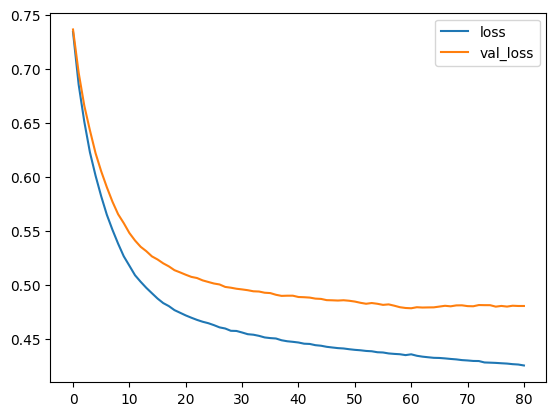

In [62]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()

In [63]:
from tensorflow import keras

model=keras.Sequential()
model.add(keras.layers.Dense(16,activation='relu',input_shape=(8,)))
model.add(keras.layers.Dropout(0,4)) # 16의 노드 중 랜덤으로 40%를 꺼라 10~40 사이로 해야됨 50 넘어가면 성능이 오히려 떨어짐
model.add(keras.layers.Dense(2,activation='softmax'))

es=keras.callbacks.EarlyStopping(patience=20,restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy',metrics='accuracy',optimizer='adam')

history=model.fit(train_scaled, train_y,epochs=500,
                  validation_data=(test_scaled,test_y),callbacks=[es])


Epoch 1/500
20/20 [==============================] - 1s 13ms/step - loss: 0.8260 - accuracy: 0.5472 - val_loss: 0.8185 - val_accuracy: 0.4870
Epoch 2/500
20/20 [==============================] - 0s 4ms/step - loss: 0.7335 - accuracy: 0.6026 - val_loss: 0.7398 - val_accuracy: 0.5584
Epoch 3/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6644 - accuracy: 0.6433 - val_loss: 0.6821 - val_accuracy: 0.5974
Epoch 4/500
20/20 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.6775 - val_loss: 0.6394 - val_accuracy: 0.6429
Epoch 5/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5771 - accuracy: 0.7052 - val_loss: 0.6066 - val_accuracy: 0.6818
Epoch 6/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5494 - accuracy: 0.7215 - val_loss: 0.5844 - val_accuracy: 0.7078
Epoch 7/500
20/20 [==============================] - 0s 4ms/step - loss: 0.5302 - accuracy: 0.7329 - val_loss: 0.5667 - val_accuracy: 0.7143
Epoch 8/500


In [64]:
model.evaluate(test_scaled,test_y) # 정확도 76%

5/5 [==============================] - 0s 3ms/step - loss: 0.4857 - accuracy: 0.7597


[0.4856666922569275, 0.7597402334213257]